In [1]:
# Machine Learning with SciKit Learn
# Focus is on hands on applications
# using fit() and predict() methods


In [2]:
# Getting and Setting up Data, using an example dataset from SciKit Learn
# Using linear regression to predict house prices by leveraging multiple variables

import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [3]:
# plotting imports
import matplotlib.pyplot as plt
import seaborn as sns

# Set the seaborn style
sns.set_style('whitegrid')
%matplotlib inline

   

In [4]:
# import Boston dataset from SciKit Learn
from sklearn import datasets
boston = datasets.load_boston()


In [5]:
# use the DESCR method to get details on the dataset
print (boston.DESCR)

Boston House Prices dataset

Notes
------
Data Set Characteristics:  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive
    
    :Median Value (attribute 14) is usually the target

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pupil-teacher ratio by town
      

Text(0,0.5,'Num of Houses')

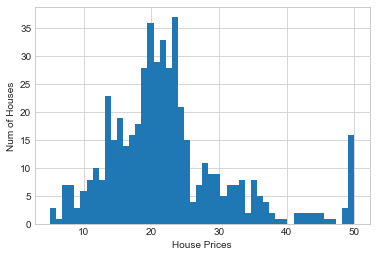

In [6]:
# Analyze the data first
# plotting a histogram

plt.hist(boston.target, bins = 50)

plt.xlabel('House Prices')
plt.ylabel('Num of Houses')


Text(0,0.5,'House Price')

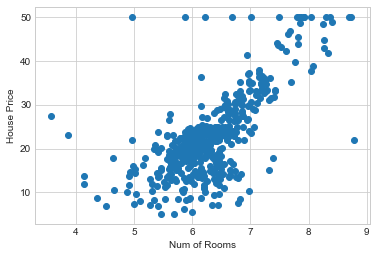

In [7]:
# try to analyze Price based on average rooms in the house
# use a scatter plot to find the relationship

plt.scatter(boston.data[:,5], boston.target)

plt.xlabel('Num of Rooms')
plt.ylabel('House Price')

In [8]:
# Convert into a Data Frame, set the feature name as columns

boston_df = DataFrame(boston.data)

boston_df.columns = boston.feature_names

boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [9]:
# Adding target to the Data Frame

boston_df['Price'] = boston.target

In [10]:
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


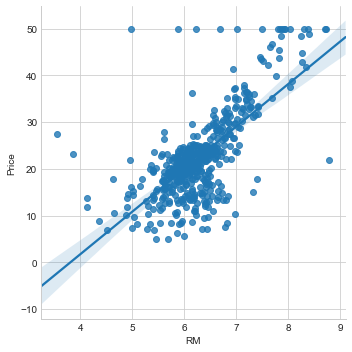

In [11]:
# Using Seaborn do a linear fit model on price vs # of rooms

sns.lmplot('RM','Price', data = boston_df)

In [12]:
# Try to find best fit line using least squares method
# Use numpy and Scikit learn to achive the objective

# set your x and y variables
X = boston_df.RM
# Numpy needs a multidimensional array for which we can use vstack method
X = np.vstack(boston_df.RM)

# Check the shape of X
X.shape

(506, 1)

In [13]:
# Set y axis as price

Y = boston_df.Price

In [14]:
# Univariate linear regression formula
# y = mx + b
# y = Ap
# A = [x 1]
# p = [m]
#     [b]

# Create an array [X 1] using list compresension from [X]

X = np.array([[value, 1] for value in X])

In [15]:
X

array([[array([6.575]), 1],
       [array([6.421]), 1],
       [array([7.185]), 1],
       ...,
       [array([6.976]), 1],
       [array([6.794]), 1],
       [array([6.03]), 1]], dtype=object)

In [16]:
# use linear algerba library least square method

m , b = np.linalg.lstsq(X,Y)[0]

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  This is separate from the ipykernel package so we can avoid doing imports until


Text(0,0.5,'House Price')

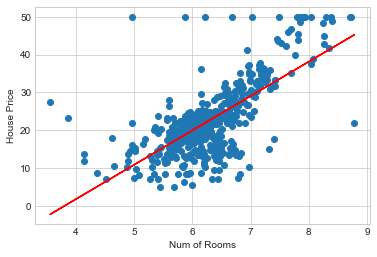

In [17]:
# Plot the original set instead of using Seaborn
plt.plot(boston_df.RM, boston_df.Price,'o')

x = boston_df.RM

plt.plot(x, m*x + b , 'r', label = 'Best Fit Line')

plt.xlabel('Num of Rooms')
plt.ylabel('House Price')

In [18]:
# Check the error in our univariate regression method
# Using Root Mean Square Error

result = np.linalg.lstsq(X,Y)

# error is stored at index 1

error_total = result[1]

# Get Root Mean Square

rmse = np.sqrt(error_total/len(X))

print('Root Mean Square Error was %.2f' %rmse)

# 95% of the time the price is going to be within $13.2 k of line fit

Root Mean Square Error was 6.60


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  after removing the cwd from sys.path.


In [19]:
# Use multiple variables to perform linear regression (multi variate regression)

import sklearn
from sklearn.linear_model import LinearRegression


In [20]:
# Create a linear regression object
lreg = LinearRegression()

In [21]:
# Use Fit, Predict and Score
# sepeate the data frame into target and data columms

X_multi = boston_df.drop('Price', 1)
Y_target = boston_df.Price

In [22]:
# use the fit method
lreg.fit(X_multi,Y_target)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [23]:
print(' Estimated intercept coefficient is %.2f' %lreg.intercept_)
print(' Number of coefficients used was %d' %len(lreg.coef_))


 Estimated intercept coefficient is 36.49
 Number of coefficients used was 13


In [24]:
# Find Coeficient estimate for each feature
# Create a new data frame from features

coeff_df = DataFrame(boston_df.columns)
coeff_df.columns = ['Features']
coeff_df['Coefficient Estimate'] = Series(lreg.coef_)
coeff_df

,Features,Coefficient Estimate
0,CRIM,-0.107171
1,ZN,0.046395
2,INDUS,0.020860
3,CHAS,2.688561
4,NOX,-17.795759
5,RM,3.804752
6,AGE,0.000751
7,DIS,-1.475759
8,RAD,0.305655
9,TAX,-0.012329


In [25]:
# Use training and validation sets
# Split data set randomly into training and testing data set, use model_selection library

X_train , X_test, Y_train, Y_test = sklearn.model_selection.train_test_split(X,boston_df.Price)


In [26]:
print(X_train.shape, X_test.shape,Y_train.shape, Y_test.shape )

(379, 2) (127, 2) (379,) (127,)


In [27]:
# use the training set to predict house prices

lreg = LinearRegression()

lreg.fit(X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# use the predit method

pred_train = lreg.predict(X_train)
pred_test = lreg.predict(X_test)

In [29]:
# we already know the  root mean squared error
#rmse = np.sqrt(error_total/len(X))

# Mean Square Error
print ('Fit a model X_train, and calculate the MSE with Ytrain: %2f' % np.mean((Y_train - pred_train)**2))
print ('Fit a model X_train, and calculate the MSE with X_test and Ytest: %2f' %np.mean((Y_test - pred_test)**2))

# Root Mean Square error
print ('Fit a model X_train, and calculate the RMSE with Ytrain: %2f' %np.sqrt(np.mean((Y_train - pred_train)**2)))
print ('Fit a model X_train, and calculate the RMSE with X_test and Ytest: %2f' %np.sqrt(np.mean((Y_test - pred_test)**2)))

Fit a model X_train, and calculate the MSE with Ytrain: 42.652734
Fit a model X_train, and calculate the MSE with X_test and Ytest: 46.599550
Fit a model X_train, and calculate the RMSE with Ytrain: 6.530906
Fit a model X_train, and calculate the RMSE with X_test and Ytest: 6.826386


Text(0.5,1,'Residual Plots')

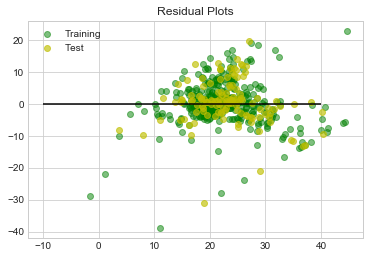

In [30]:
# Visualize using Residual plots
# Residual = Observed Value - Predicted value

train = plt.scatter(pred_train,(pred_train - Y_train), c = 'g', alpha = 0.5)

test = plt.scatter(pred_test, (pred_test - Y_test), c = 'y',alpha = 0.65 )

plt.hlines(y = 0 , xmin = -10, xmax = 40)

plt.legend ((train, test), ('Training', 'Test'), loc = 'upper left')

plt.title('Residual Plots')

In [31]:
# Logistic Regression
# Another form of supervised learning
# Classification using logistic regression
# use statsmodule to get the datasets

import numpy as np
import pandas as pd
from pandas import Series, DataFrame

import math
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

from sklearn import metrics

#import statsmodels.api as sm

In [32]:
import statsmodels.api as sm

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [33]:
# Given certain variables can we classify if women participated in an affair
# dataset has over 6000 obeservations and 9 variables

# Load the data set from stats module and create a dataframe

df = sm.datasets.fair.load_pandas().data

In [34]:
df.head()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


In [35]:
# Create a new column had affair with values 0 and 1
# create a function to populate the new column

def affair(x):
    if x != 0:
        return 1
    else:
        return 0
    

In [36]:
df['Had_Affair'] = df['affairs'].apply(affair)

In [37]:
df.drop(['Had Affair'], axis = 1, inplace = True)

ValueError: labels ['Had Affair'] not contained in axis

In [ ]:
df.head()

In [ ]:
# Grouping by had affair column for additional analysis
df.groupby('Had_Affair').mean()

In [ ]:
# Visualize using Seaborn to get additional insight

sns.factorplot('age', data = df, hue = 'Had_Affair', kind = 'count')

# Max affairs around age 27

In [ ]:
sns.factorplot('yrs_married', data = df, hue = 'Had_Affair', kind = 'count')

# having affair increases a years married increases unless it happens in the first 3 years

In [ ]:
sns.factorplot('children', data = df, hue = 'Had_Affair', kind = 'count')
# women with more children seem to have less affairs

In [ ]:
sns.factorplot('educ', data = df, hue = 'Had_Affair', kind = 'count')

# Looks like women with education of 12 - 14 years seem to have affairs

In [ ]:
# Now that we have imported data and analyzed it using some charts
# Lets prepare data for occupation and husband occupation as there are six possible categories
# Create new dataframes for categorical variables; its to ensure that a variable is treated as a categorical variable

occ_dummies = pd.get_dummies(df['occupation'])
hus_occ_dummies = pd.get_dummies(df['occupation_husb'])

occ_dummies.head()



In [ ]:
# Provide column names to the new dataframes

occ_dummies.columns = ['occ1', 'occ2','occ3', 'occ4', 'occ5', 'occ6']

hus_occ_dummies.columns = ['hocc1', 'hocc2','hocc3', 'hocc4', 'hocc5', 'hocc6']

In [ ]:
hus_occ_dummies.head()

In [ ]:
# Create x and y targets for logistic regression

# replace the occupataion columns with dummy columns
X = df.drop(['occupation', 'occupation_husb', 'Had_Affair'], axis = 1)

In [ ]:
X.head()


In [ ]:
# now concatenate the dataframes

dummies = pd.concat([occ_dummies, hus_occ_dummies], axis = 1)

In [ ]:
dummies.head()

In [ ]:
# lets concatnate X and dummies

X = pd.concat([X, dummies], axis = 1)

In [ ]:
X.head()

In [ ]:
# Lets set up the Y target

Y = df.Had_Affair

Y.head()

In [ ]:
# Dummy variables causes Multicollinearity, we need to drop few columns

X = X.drop(['occ1', 'hocc1'], axis = 1)

In [ ]:
X.head()

In [ ]:
# Since Affairs column is a repeat of Y target we need to remove it as well
X = X.drop(['affairs'], axis = 1)

X.head()

In [ ]:
# we need to set Y target as an 1d array to use with Scikit Learn, basically flatten the array
Y = np.ravel(Y)

Y

In [ ]:
# Create the Model

log_model = LogisticRegression()

log_model.fit(X,Y)

log_model.score(X, Y)  # check the accuracy

In [ ]:
# Now lets compare against Y target (null error rate)
# basically we are doing slighlty better than null error rate

Y.mean()

# 

In [ ]:
# Lets check other variables and get their coeffiecients

coeff_df = DataFrame(list(zip(X.columns, np.transpose(log_model.coef_))))
coeff_df

In [ ]:
# Lets test and train our datasets using Scikit Learn

X_train, X_test, Y_train, Y_test = train_test_split(X,Y)



In [ ]:
# Create a new model

log_model2 = LogisticRegression()

# lets fit the model with the training set

log_model2.fit(X_train,Y_train)

In [ ]:
# run a prediction using test data set

class_predict = log_model2.predict(X_test)


In [ ]:
# compare Y test to class predict

print (metrics.accuracy_score(Y_test, class_predict))

# Results are similar to our earlier score

In [39]:
# Multiclass Classification
# use One vs all or One vs rest

# Data Imports
import numpy as np
import pandas as pd
from pandas import Series,DataFrame

# Plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

%matplotlib inline


In [40]:
from sklearn import linear_model
from sklearn.datasets import load_iris

In [41]:
iris = load_iris()

In [42]:
# Set features and targetes

X = iris.data

Y = iris.target

In [43]:
print (iris.DESCR)

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ====================

    :Missing Attribute Values: None
  

In [44]:
# Create a Dataframe

iris_data= DataFrame(X, columns = ['Sepal_Length', 'Sepal_Width', 'Petal_Length', 'Petal_Width'])


In [45]:
# Create a DataFrame for the target

iris_target = DataFrame(Y, columns = ['Species'])

In [46]:
# Species are given as numeric categories, change them to the species name
#iris_target.head()

def flower(num):
    if num == 0:
        return 'Setosa'
    elif num == 1:
        return 'Versicolor'
    else:
        return 'Virginica'
        

In [47]:
# using apply update the dataframe

iris_target['Species'] = iris_target['Species'].apply(flower)

In [48]:
iris_target.head()
iris_data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [49]:
# Lets combine the 2 dataframes

iris = pd.concat([iris_data, iris_target], axis = 1)

In [50]:
iris.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


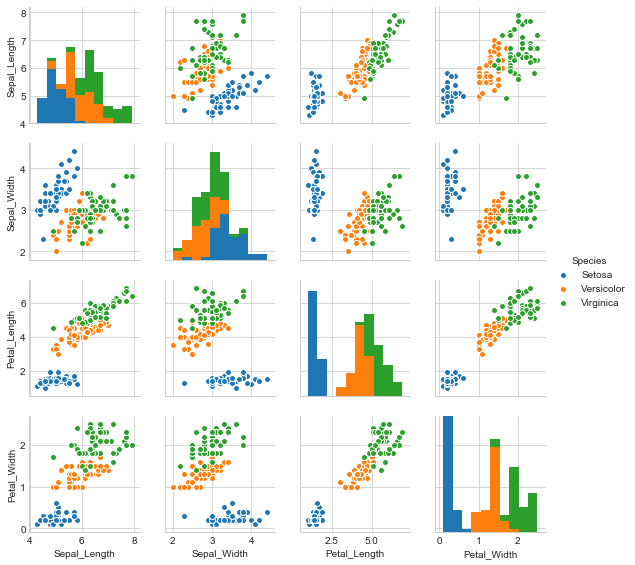

In [51]:
# Data visuzlization to analyze it further using seaborn

sns.pairplot(iris, hue = 'Species', size = 2)

# Setosa seems to be seperated from the other 2

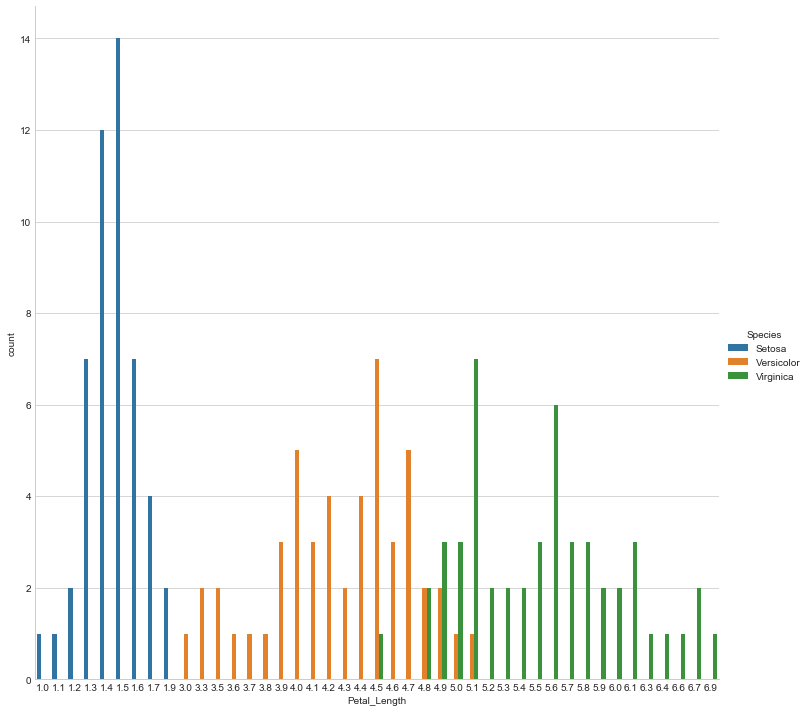

In [52]:
sns.factorplot('Petal_Length', data = iris, hue = 'Species', size = 10, kind = 'count')

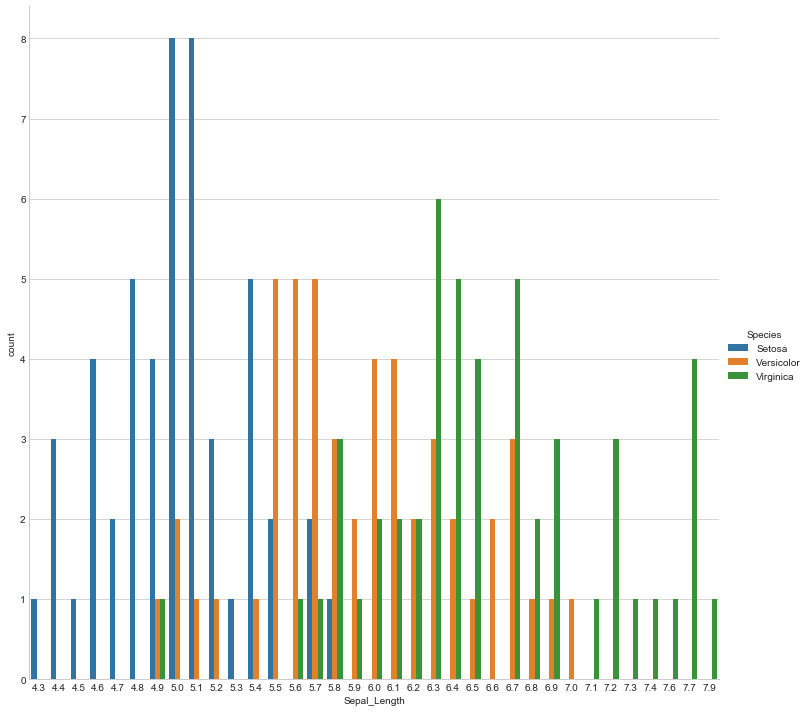

In [53]:
sns.factorplot('Sepal_Length', data = iris, hue = 'Species', size = 10, kind = 'count')

In [55]:
# Use Scikit learn to perform Multi class classification

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split



In [56]:
logreg = LogisticRegression()

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 3)



In [57]:
# Lets fit our model with training datasets

logreg.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [58]:
# Lets test the model accuracy

from sklearn import metrics


In [59]:
# Predict the target using the testing dataset

Y_pred = logreg.predict(X_test)

In [60]:
# Compare against the Y_test

print(metrics.accuracy_score(Y_test, Y_pred))

# The accuracy is close to 93%

0.9333333333333333


In [61]:
# K Nearest Neighbor using scikit learn

from sklearn.neighbors import KNeighborsClassifier

In [62]:
knn = KNeighborsClassifier(n_neighbors = 6)



In [63]:
# Lets fit our training data

knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [64]:
# lets predict data using the testing data set

Y_pred = knn.predict(X_test)

In [65]:
# Lets compare and find the accuracy score by comparing test against prediction

print(metrics.accuracy_score(Y_test, Y_pred))

# We get 95% accuracy with k =6 

0.95


In [66]:
# Lets change the k value

knn1 = KNeighborsClassifier(n_neighbors = 1)

In [67]:
# Lets fit our training data
knn.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=6, p=2,
           weights='uniform')

In [68]:
# lets predict data using the testing data set

Y_pred = knn.predict(X_test)

In [69]:
# Lets compare and find the accuracy score by comparing test against prediction

print(metrics.accuracy_score(Y_test, Y_pred))

# We get 95% accuracy with k =1 same as 6

0.95


In [71]:
# try to get the values across multiple ranges

k_range = range(1,21)

accuracy = []


In [72]:
for k in k_range:
    knn =  KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, Y_train)
    Y_pred = knn.predict(X_test)
    
    accuracy.append(metrics.accuracy_score(Y_test, Y_pred))

Text(0,0.5,'Accuracy')

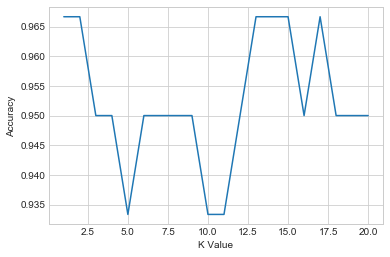

In [73]:
plt.plot(k_range, accuracy)
plt.xlabel('K Value')
plt.ylabel('Accuracy')

In [74]:
#  Support Vector Machines : Supervised Learning Models with associated learning algos can be used for regression and classification

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [75]:
from sklearn import datasets

In [77]:
# Grab the data and set features and target

iris = datasets.load_iris()

X = iris.data

Y = iris.target

In [78]:
# import the SVC from sklearn

from sklearn.svm import SVC

In [79]:
# Create a model
model = SVC()

In [92]:
# Assign Training and testing data set

from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.4, random_state = 6) 

In [93]:
type(X_train)

numpy.ndarray

In [94]:
# Pass the training data to the model

model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [95]:
# test the model using training data

from sklearn import metrics

# Compare the prediction against test data

predict = model.predict(X_test)

expected = Y_test

# Use accuracy score to compare expected vs predicted
print(metrics.accuracy_score(expected, predict))

# 97% accuracy

# rerun the above cells by increasing or decreasing testing size

0.9666666666666667


In [96]:
# import the entire library to test different kernel methods

from sklearn import svm

In [97]:
X = iris.data[:,:2] # selecting only the first 2 features

Y = iris.target

In [98]:
C = 1.0 # regularization parameter

# Create 4 models to create plots

In [99]:
# Linear model
svc = svm.SVC(kernel = 'linear', C=C).fit(X,Y)

In [100]:
# Guassian Radial basis function

rbf_svc = svm.SVC(kernel = 'rbf',gamma = 0.7, C=C).fit(X,Y)

In [101]:
# 3rd degree polynomial fit

poly_svc = svm.SVC(kernel = 'poly',degree = 3, C=C).fit(X,Y)

In [102]:
# Linear SVC method
lin_svc = svm.LinearSVC(C=C).fit(X,Y)

In [103]:
# Set up a mesh grid using numpy

# Set the step size
h = 0.02

# X axis min and max
x_min=X[:, 0].min() - 1
x_max =X[:, 0].max() + 1

# Y axis min and max
y_min = X[:, 1].min() - 1
y_max = X[:, 1].max() + 1

# Finally, numpy can create a meshgrid
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))

In [104]:
# title for the plots
titles = ['SVC with linear kernel',
          'LinearSVC (linear kernel)',
          'SVC with RBF kernel',
          'SVC with polynomial (degree 3) kernel']

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\contour.py:909: UserWarning: linewidths is ignored by contourf
  warnings.warn('linewidths is ignored by contourf')


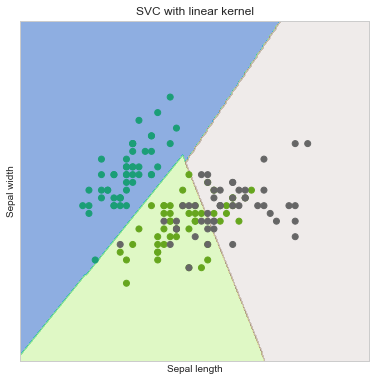

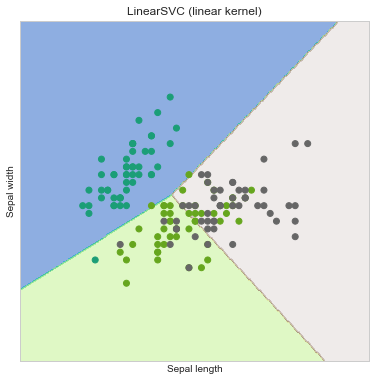

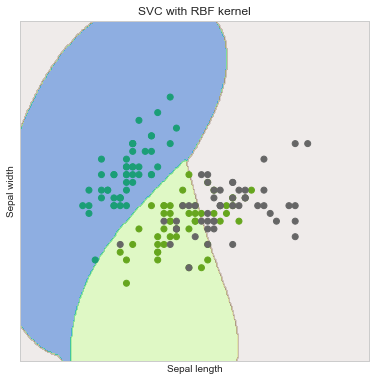

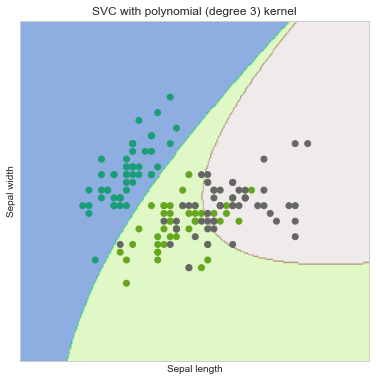

In [105]:
# Create a for loop 

for i, clf in enumerate((svc, lin_svc, rbf_svc, poly_svc)):
    
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, m_max]x[y_min, y_max].
    plt.figure(figsize=(15,15))
    # Set the subplot position (Size = 2 by 2, position deifined by i count
    plt.subplot(2, 2, i + 1)
    
    # SUbplot spacing
    plt.subplots_adjust(wspace=0.4, hspace=0.4)
    
    # Define Z as the prediction, not the use of ravel to format the arrays
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    # Contour plot (filled with contourf)
    plt.contourf(xx, yy, Z, cmap=plt.cm.terrain, alpha=0.5,linewidths=0)

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Dark2)
    
    # Labels and Titles
    plt.xlabel('Sepal length')
    plt.ylabel('Sepal width')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.xticks(())
    plt.yticks(())
    plt.title(titles[i])
    


plt.show()

In [106]:
# Naive Bayes Classifiers : Supervised learning

import pandas as pd
from pandas import Series,DataFrame

import matplotlib.pyplot as plt
import seaborn as sns

# Gaussian Naive Bayes
from sklearn import datasets
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB



In [107]:
# load the iris datasets
iris = datasets.load_iris()

# Grab features (X) and the Target (Y)
X = iris.data

Y = iris.target


In [108]:
model = GaussianNB()

In [109]:
from sklearn.model_selection import train_test_split
# Split the data into Trainging and Testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y)

In [110]:
# Fit the training model
model.fit(X_train,Y_train)

GaussianNB(priors=None)

In [111]:
# Predicted outcomes
predicted = model.predict(X_test)

# Actual Expected Outvomes
expected = Y_test

In [113]:
print (metrics.accuracy_score(expected, predicted))

0.9736842105263158


In [114]:
# Decision Tree and Random Forests


%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn

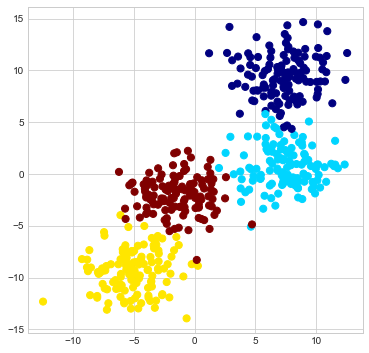

In [116]:
# Random forests are an ensemble of decision trees

from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples =500, centers = 4, random_state = 8, cluster_std = 2.0)

# make a scatter plot to visualize the data

plt.figure(figsize=(6,6))


plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')

In [117]:
# import decision tree classifier

from sklearn.tree import DecisionTreeClassifier

# Create function to visualize the decision tree

def visualize_tree(classifier, X, y, boundaries=True,xlim=None, ylim=None):
    '''
    Visualizes a Decision Tree. 
    INPUTS: Classifier Model, X, y, optional x/y limits.
    OUTPUTS: Meshgrid visualization for boundaries of the Decision Tree
    '''
     
    # Fit the X and y data to the tree
    classifier.fit(X, y)

    
    # Automatically set the x and y limits to the data (+/- 0.1)
    if xlim is None:
        xlim = (X[:, 0].min() - 0.1, X[:, 0].max() + 0.1)
    if ylim is None:
        ylim = (X[:, 1].min() - 0.1, X[:, 1].max() + 0.1)

    # Assign the variables
    x_min, x_max = xlim
    y_min, y_max = ylim
    
    
    # Create a mesh grid
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                         np.linspace(y_min, y_max, 100))
    
    # Define the Z by the predictions (this will color in the mesh grid)
    Z = classifier.predict(np.c_[xx.ravel(), yy.ravel()])

    # Reshape based on meshgrid
    Z = Z.reshape(xx.shape)
    
    # Plot the figure (use)
    plt.figure(figsize=(10,10))
    plt.pcolormesh(xx, yy, Z, alpha=0.2, cmap='jet')
    

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='jet')
    
    #Set Limits
    plt.xlim(x_min, x_max)
    plt.ylim(y_min, y_max)        
    
    def plot_boundaries(i, xlim, ylim):
        '''
        Plots the Decision Boundaries
        '''
        if i < 0:
            return

        # Shorter variable name
        tree = classifier.tree_
        
        # Recursively go through nodes of tree to plot boundaries.
        if tree.feature[i] == 0:
            plt.plot([tree.threshold[i], tree.threshold[i]], ylim, '-k')
            plot_boundaries(tree.children_left[i],
                            [xlim[0], tree.threshold[i]], ylim)
            plot_boundaries(tree.children_right[i],
                            [tree.threshold[i], xlim[1]], ylim)
        
        elif tree.feature[i] == 1:
            plt.plot(xlim, [tree.threshold[i], tree.threshold[i]], '-k')
            plot_boundaries(tree.children_left[i], xlim,
                            [ylim[0], tree.threshold[i]])
            plot_boundaries(tree.children_right[i], xlim,
                            [tree.threshold[i], ylim[1]])
    
    # Random Forest vs Single Tree
    if boundaries:
        plot_boundaries(0, plt.xlim(), plt.ylim())

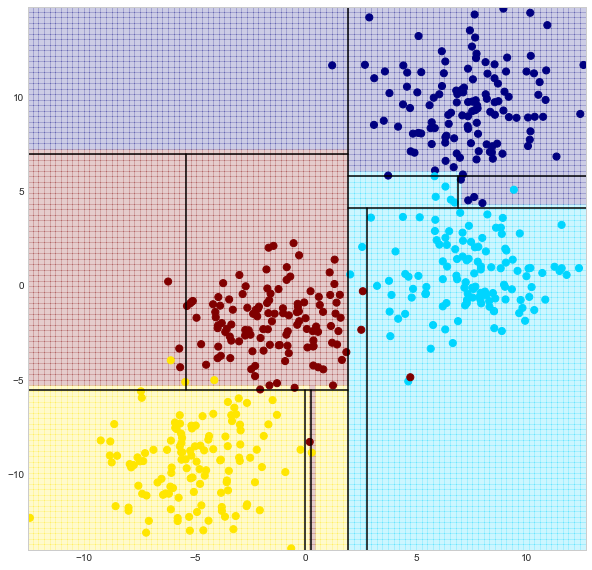

In [119]:
clf = DecisionTreeClassifier(max_depth = 4, random_state = 0)

visualize_tree(clf, X, y)

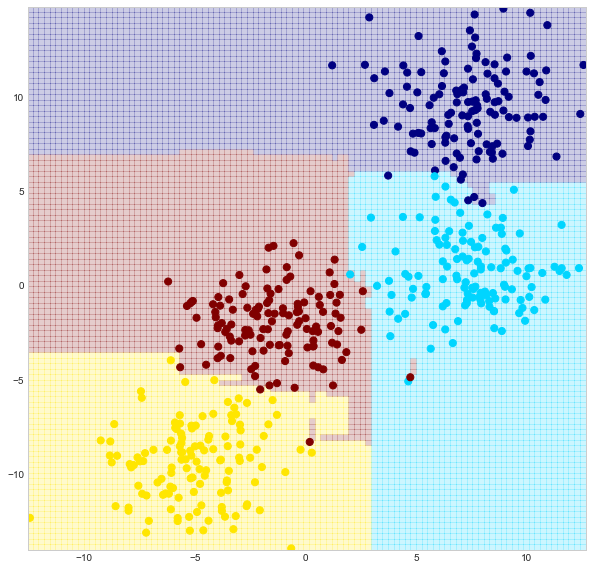

In [120]:
# Create a randon forest

from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(n_estimators= 100, random_state = 0)

visualize_tree(clf, X, y, boundaries = False)

In [122]:
x = 10 * np.random.rand(100)

In [123]:
def sin_model(x, sigma = 0.2):
    noise = sigma * np.random.rand((len(x)))
    return np.sin(5*x) + np.sin(0.5 *x) + noise

In [124]:
y = sin_model(x)

<Container object of 3 artists>

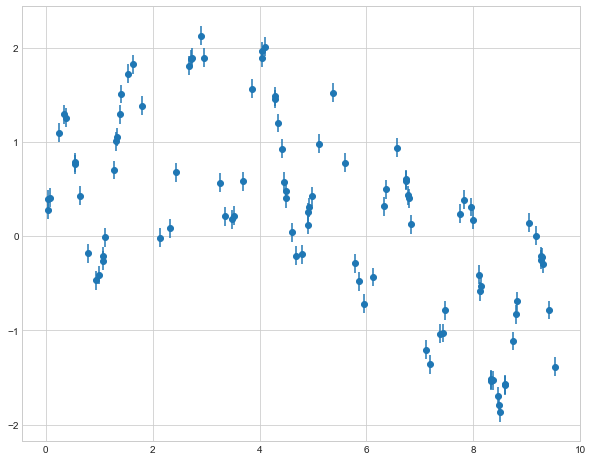

In [127]:
plt.figure(figsize = (10,8))

plt.errorbar(x,y,0.1, fmt ='o')

In [128]:
from sklearn.ensemble import RandomForestRegressor
xfit = np.linspace(0,10,1000)



In [129]:
rfr = RandomForestRegressor(100)

rfr.fit(x[:, None], y)

yfit = rfr.predict(xfit[:, None])

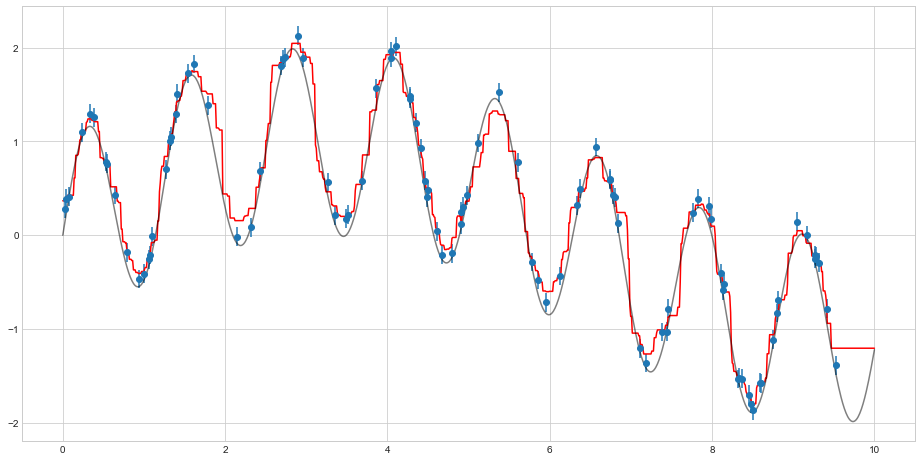

In [131]:
 # Set real poitns (the model function)
ytrue = sin_model(xfit, 0)

# Plot 
plt.figure(figsize=(16,8))
plt.errorbar(x, y, 0.1, fmt='o')

plt.plot(xfit, yfit, '-r');
plt.plot(xfit, ytrue, '-k', alpha=0.5);

In [132]:
## natural language processing


#!conda install nltk #This installs nltk

# Install data sets

#import nltk # Imports the library
# nltk.download() 
# download stop words corpus using command prompt

In [133]:
pwd


'C:\\Users\\Admin\\Desktop\\Python Training'

In [135]:
messages = [line.rstrip() for line in open('smsspamcollection/SMSSpamCollection')]
print (len(messages))

5574


In [137]:
for num , message in enumerate(messages[:10]):
    print (num, message)
    print ('\n')

0 ham	Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...


1 ham	Ok lar... Joking wif u oni...


2 spam	Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's


3 ham	U dun say so early hor... U c already then say...


4 ham	Nah I don't think he goes to usf, he lives around here though


5 spam	FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, Â£1.50 to rcv


6 ham	Even my brother is not like to speak with me. They treat me like aids patent.


7 ham	As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune


8 spam	WINNER!! As a valued network customer you have been selected to receivea Â£900 prize reward! To claim call 09061701461. Claim cod

In [138]:
import pandas


In [144]:
# create a data frame

messages = pandas.read_csv('smsspamcollection/SMSSpamCollection', sep ='\t', names = ['labels', 'messages'])

In [151]:
messages.head()

,labels,messages,length
0,ham,"Go until jurong point, crazy.. Available only ...",111
1,ham,Ok lar... Joking wif u oni...,29
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,ham,U dun say so early hor... U c already then say...,49
4,ham,"Nah I don't think he goes to usf, he lives aro...",61


In [146]:
# analyze and visualize the data set

messages.describe()

,labels,messages
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


In [148]:
messages.groupby('labels').describe()

messages                                                               
          count unique                                                top freq
labels                                                                        
ham        4825   4516                             Sorry, I'll call later   30
spam        747    653  Please call our customer service representativ...    4

In [150]:
messages['length'] = messages['messages'].apply(len)

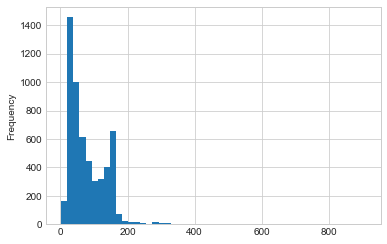

In [152]:
# visualize the data for explotary analysis

messages['length'].plot(bins = 50, kind = 'hist')

In [153]:
messages['length'].describe()

count    5572.000000
mean       80.489950
std        59.942907
min         2.000000
25%        36.000000
50%        62.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

In [156]:
# find the message with max length

messages[messages['length']==910]
# adding masking to see the entire message
messages[messages['length']==910]['messages'].iloc[0]

"For me the love should start with attraction.i should feel that I need her every time around me.she should be the first thing which comes in my thoughts.I would start the day and end it with her.she should be there every time I dream.love will be then when my every breath has her name.my life should happen around her.my life will be named to her.I would cry for her.will give all my happiness and take all her sorrows.I will be ready to fight with anyone for her.I will be in love when I will be doing the craziest things for her.love will be when I don't have to proove anyone that my girl is the most beautiful lady on the whole planet.I will always be singing praises for her.love will be when I start up making chicken curry and end up makiing sambar.life will be the most beautiful then.will get every morning and thank god for the day because she is with me.I would like to say a lot..will tell later.."

array([<matplotlib.axes._subplots.AxesSubplot object at 0x000002A883F55DA0>,
      dtype=object)

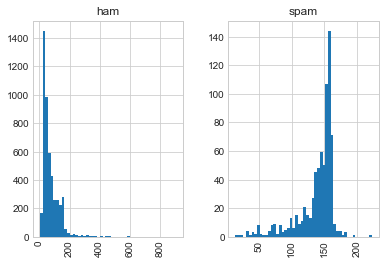

In [158]:
# Plot histogram based on labels

messages.hist(column = 'length', by= 'labels', bins = 50)

# what it tells us 

In [159]:
# Now we have to proces the data, we need feature vector using bag of words
import string

mess = 'Sample message! Notice: it has a punctuation'


In [160]:
# remove punctuations using a sample text
nopunc = [char for char in mess if char not in string.punctuation]

In [162]:
nopunc = ''.join(nopunc)

In [163]:
nopunc

'Sample message Notice it has a punctuation'

In [164]:
# remove stop words 

from nltk.corpus import stopwords

In [165]:
nopunc.split()

['Sample', 'message', 'Notice', 'it', 'has', 'a', 'punctuation']

In [167]:
clean_mess = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [168]:
clean_mess # got rid of it, has and a

['Sample', 'message', 'Notice', 'punctuation']

In [169]:
# create a function to apply to our data frame

def text_process(mess):
    """
    Takes in a string of text, then performs the following:
    1. Remove all punctuation
    2. Remove all stopwords
    3. Returns a list of the cleaned text
    """
    # Check characters to see if they are in punctuation
    nopunc = [char for char in mess if char not in string.punctuation]

    # Join the characters again to form the string.
    nopunc = ''.join(nopunc)
    
    # Now just remove any stopwords
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [171]:
# Apply the fuction to the data frame

messages['messages'].head(5).apply(text_process)

0    [Go, jurong, point, crazy, Available, bugis, n...
1                       [Ok, lar, Joking, wif, u, oni]
2    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
3        [U, dun, say, early, hor, U, c, already, say]
4    [Nah, dont, think, goes, usf, lives, around, t...
Name: messages, dtype: object

In [172]:
from sklearn.feature_extraction.text import CountVectorizer

In [174]:
bow_transformer = CountVectorizer(analyzer=text_process).fit(messages['messages'])

# Print total number of vocab words


In [175]:
message4 = messages['messages'][3]

In [176]:
print(message4)

U dun say so early hor... U c already then say...


In [177]:
bow4 = bow_transformer.transform([message4])

In [178]:
print(bow4)

  (0, 4068)	2
  (0, 4629)	1
  (0, 5261)	1
  (0, 6204)	1
  (0, 6222)	1
  (0, 7186)	1
  (0, 9554)	2


In [180]:
print (bow_transformer.get_feature_names()[4068])

U


In [182]:
messages_bow = bow_transformer.transform(messages['messages'])
#print len(bow_transformer.vocabulary_)

In [183]:
#messages_bow = bow_transformer.transform(messages['message'])
print ('Shape of Sparse Matrix: ', messages_bow.shape)
print ('Amount of Non-Zero occurences: ', messages_bow.nnz)
print ('sparsity: %.2f%%' % (100.0 * messages_bow.nnz / (messages_bow.shape[0] * messages_bow.shape[1])))

Shape of Sparse Matrix:  (5572, 11425)
Amount of Non-Zero occurences:  50548
sparsity: 0.08%


In [184]:
from sklearn.feature_extraction.text import TfidfTransformer

tfidf_transformer = TfidfTransformer().fit(messages_bow)
tfidf4 = tfidf_transformer.transform(bow4)
print (tfidf4)

  (0, 9554)	0.5385626262927564
  (0, 7186)	0.4389365653379857
  (0, 6222)	0.3187216892949149
  (0, 6204)	0.29953799723697416
  (0, 5261)	0.29729957405868723
  (0, 4629)	0.26619801906087187
  (0, 4068)	0.40832589933384067


In [185]:
print (tfidf_transformer.idf_[bow_transformer.vocabulary_['u']])


3.2800524267409408


In [186]:
#print tfidf_transformer.idf_[bow_transformer.vocabulary_['university']]

messages_tfidf = tfidf_transformer.transform(messages_bow)
print (messages_tfidf.shape)

(5572, 11425)


In [187]:
from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(messages_tfidf, messages['labels'])

In [190]:
print ('predicted:', spam_detect_model.predict(tfidf4)[0])
print ('expected:', messages['labels'][3])

predicted: ham
expected: ham


In [191]:
# Model Evaluation

all_predictions = spam_detect_model.predict(messages_tfidf)
print (all_predictions)

['ham' 'ham' 'spam' ... 'ham' 'ham' 'ham']


In [194]:
from sklearn.metrics import classification_report
print (classification_report(messages['labels'], all_predictions))

             precision    recall  f1-score   support

        ham       0.98      1.00      0.99      4825
       spam       1.00      0.85      0.92       747

avg / total       0.98      0.98      0.98      5572



In [196]:
# Create training and testing dataset
from sklearn.model_selection import train_test_split

msg_train, msg_test, label_train, label_test = train_test_split(messages['messages'], messages['labels'], test_size=0.2)

print (len(msg_train), len(msg_test), len(msg_train) + len(msg_test))

4457 1115 5572


In [197]:
# Use Sklearns pipeline

from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('bow', CountVectorizer(analyzer=text_process)),  # strings to token integer counts
    ('tfidf', TfidfTransformer()),  # integer counts to weighted TF-IDF scores
    ('classifier', MultinomialNB()),  # train on TF-IDF vectors w/ Naive Bayes classifier
])

In [198]:
pipeline.fit(msg_train,label_train)

Pipeline(memory=None,
     steps=[('bow', CountVectorizer(analyzer=<function text_process at 0x000002A8846346A8>,
        binary=False, decode_error='strict', dtype=<class 'numpy.int64'>,
        encoding='utf-8', input='content', lowercase=True, max_df=1.0,
        max_features=None, min_df=1, ngram_range=(1, 1), preprocesso...f=False, use_idf=True)), ('classifier', MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))])

In [199]:
predictions = pipeline.predict(msg_test)

In [200]:
print (classification_report(predictions,label_test))

             precision    recall  f1-score   support

        ham       1.00      0.97      0.98      1007
       spam       0.76      1.00      0.86       108

avg / total       0.98      0.97      0.97      1115

